## Word evolution

In [6]:
import pickle as pkl
with open("model/dtm.pkl", 'rb') as fp:
    model = pkl.load(fp)
    print(model.__class__)

<class 'gensim.models.wrappers.dtmmodel.DtmModel'>


In [1]:
import pandas as pd
model_df = pd.read_csv("output/model_df.csv")

In [7]:
# cite https://github.com/GSukr/dtmvisual
import pandas as pd
import matplotlib.pyplot as plt
def partition_df(df):
    
    """
    :param df: Dataframe with corresponding weight for each top word in each topic of each period
    :return: partition based on TopicID
    
    """
    
    d = {} # d[i] contains records for TopicID i
    for topic in list(df['topicId'].unique()): # for each topic
        d[topic] = df.loc[df['topicId'] == topic] # create dataframe with records
        print('Number of records for Topic %d = %d' %(topic, len(d[topic])))
    return d

def displayTopic(d, i):
    
    """
    function to display Word-Probability by period for topic i
    """
    s = d[i][['period', 'word', 'weight']]
    fig, ax = plt.subplots(figsize=(15,10))
    for key, grp in s.groupby(['word']):
        ax = grp.plot(ax=ax, kind='line', x='period', y='weight', fontsize=12, label=key, linewidth=3.0)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Top keywords", fontsize='large', labelspacing=0.6, fancybox = False)
    plt.show()
        
def visualize_words(df, d):
    """
    function to visualize words evolution
    """
    
    for topic in list(df['topicId'].unique()):
        displayTopic(d, topic)
        print("\nResults for the topic: ", topic)

In [8]:
model_df_partitioned = partition_df(model_df)

Number of records for Topic 0 = 100
Number of records for Topic 1 = 100
Number of records for Topic 2 = 100
Number of records for Topic 3 = 100
Number of records for Topic 4 = 100
Number of records for Topic 5 = 100
Number of records for Topic 6 = 100
Number of records for Topic 7 = 100


TypeError: Empty 'DataFrame': no numeric data to plot

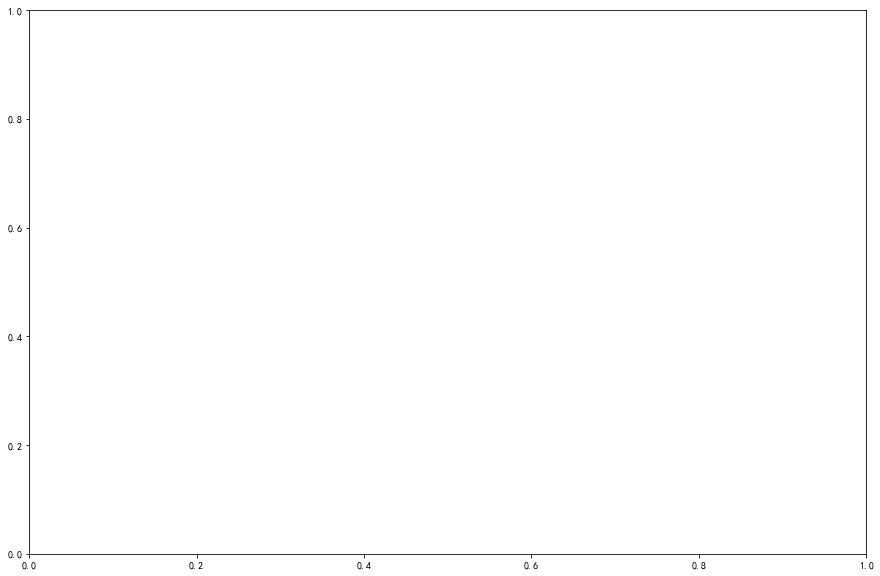

In [13]:
# displayTopic(model_df_partitioned, 0)
s = model_df_partitioned[0][['period', 'word', 'weight']]
fig, ax = plt.subplots(figsize=(15,10))
for key, grp in s.groupby(['word']):
    ax = grp.plot(ax=ax, kind='line', x='period', y='weight', fontsize=12, label=key, linewidth=3.0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Top keywords", fontsize='large', labelspacing=0.6, fancybox = False)
plt.show()